In [1]:
import tensorflow as tf

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [5]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

In [8]:
y_train[0]

9

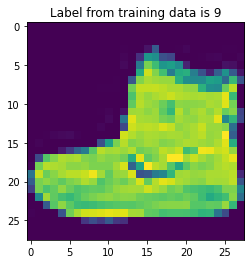

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.title(f"Label from training data is {y_train[0]}")
plt.show()

In [14]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

In [15]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [16]:
import numpy as np

In [17]:
print(np.max(X_train))
print(np.min(X_train))
print(np.max(X_test))
print(np.min(X_test))


255
0
255
0


In [18]:
#Normalization
X_train = X_train/255.0
X_test = X_test/255.0
np.max(X_train),np.min(X_test)

(1.0, 0.0)

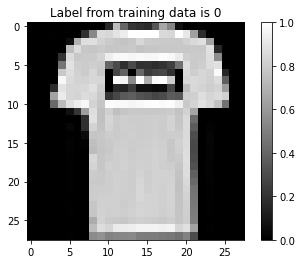

In [19]:
plt.imshow(X_train[1].reshape(28,28),cmap='gray')
plt.title(f"Label from training data is {y_train[1]}")
plt.colorbar()
plt.show()

In [20]:
X_train.shape

(60000, 784)

In [21]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [23]:
y_train.shape

(60000, 10)

In [24]:
X_val = X_train[50000:,:]
y_val = y_train[50000:,:]
X_train = X_train[:50000,:]
y_train = y_train[:50000,:]

In [25]:
X_val.shape

(10000, 784)

In [26]:
X_train.shape

(50000, 784)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()
model.add(Dense(15, activation="relu",input_shape=[784,]))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(10,activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 12)                192       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 10)                130       
                                                                 
Total params: 12,253
Trainable params: 12,253
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer="SGD",
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          epochs=100)

Epoch 1/100
1563/1563 [==============================] - 3s 668us/step - loss: 1.1719 - accuracy: 0.5890 - val_loss: 0.6935 - val_accuracy: 0.7335
Epoch 2/100
1563/1563 [==============================] - 1s 554us/step - loss: 0.5932 - accuracy: 0.7846 - val_loss: 0.5600 - val_accuracy: 0.8030
Epoch 3/100
1563/1563 [==============================] - 1s 560us/step - loss: 0.5137 - accuracy: 0.8194 - val_loss: 0.4982 - val_accuracy: 0.8227
Epoch 4/100
1563/1563 [==============================] - 1s 566us/step - loss: 0.4771 - accuracy: 0.8335 - val_loss: 0.4950 - val_accuracy: 0.8242
Epoch 5/100
1563/1563 [==============================] - 1s 590us/step - loss: 0.4516 - accuracy: 0.8418 - val_loss: 0.4782 - val_accuracy: 0.8347
Epoch 6/100
1563/1563 [==============================] - 1s 576us/step - loss: 0.4362 - accuracy: 0.8471 - val_loss: 0.4553 - val_accuracy: 0.8439
Epoch 7/100
1563/1563 [==============================] - 1s 566us/step - loss: 0.4218 - accuracy: 0.8524 - val_loss: 0

In [34]:
print('The Accuracy of the model using SGD optimizer is 86.4%')

The Accuracy of the model using SGD optimizer is 86.4%


In [35]:
model.compile(optimizer="rmsprop",
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          epochs=100)

Epoch 1/100
1563/1563 [==============================] - 1s 700us/step - loss: 0.3102 - accuracy: 0.8882 - val_loss: 0.4396 - val_accuracy: 0.8553
Epoch 2/100
1563/1563 [==============================] - 1s 624us/step - loss: 0.3107 - accuracy: 0.8890 - val_loss: 0.5064 - val_accuracy: 0.8409
Epoch 3/100
1563/1563 [==============================] - 1s 623us/step - loss: 0.3105 - accuracy: 0.8910 - val_loss: 0.4063 - val_accuracy: 0.8673
Epoch 4/100
1563/1563 [==============================] - 1s 619us/step - loss: 0.3082 - accuracy: 0.8905 - val_loss: 0.4295 - val_accuracy: 0.8646
Epoch 5/100
1563/1563 [==============================] - 1s 627us/step - loss: 0.3056 - accuracy: 0.8912 - val_loss: 0.4096 - val_accuracy: 0.8677
Epoch 6/100
1563/1563 [==============================] - 1s 616us/step - loss: 0.3039 - accuracy: 0.8907 - val_loss: 0.4646 - val_accuracy: 0.8572
Epoch 7/100
1563/1563 [==============================] - 1s 617us/step - loss: 0.3018 - accuracy: 0.8903 - val_loss: 0

In [37]:
print('The accuracy using "rmsprop" is 84.13%')

The accuracy using "rmsprop" is 84.13%
